# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# get bitcoin data & change to json format
btc_response = requests.get(btc_url)
btc_df = btc_response.json()

# get ethereum data & change to json format
eth_response = requests.get(eth_url)
eth_df = eth_response.json()

In [6]:
# show btc price in usd 
btc_df['data']["1"]["quotes"]["USD"]["price"]

63063.0

In [7]:
# show btc price in usd 
eth_df['data']["1027"]["quotes"]["USD"]["price"]

2454.12

In [8]:
# Fetch current BTC price
# YOUR CODE HERE!
my_btc_value = btc_df['data']["1"]["quotes"]["USD"]["price"] * my_btc

# Fetch current ETH price
my_eth_value = eth_df['data']["1027"]["quotes"]["USD"]["price"] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $75675.60
The current value of your 5.3 ETH is $13006.84


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [10]:
# Set Alpaca API key and secret
alpaca_api = os.getenv("ALPACA_API_KEY")
alpaca_secret = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api,
    alpaca_secret,
    api_version = "v2"
)

In [11]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-04-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date
).df

# Preview DataFrame
df_ticker.head()

AGG                                       SPY  \
                              open     high     low   close   volume    open   
time                                                                           
2021-04-12 00:00:00-04:00  114.172  114.172  114.00  114.15  3486052  410.85   
2021-04-13 00:00:00-04:00  114.120  114.460  114.11  114.46  3882927  411.53   
2021-04-14 00:00:00-04:00  114.410  114.440  114.28  114.38  3519430  412.83   

                                                              
                              high     low   close    volume  
time                                                          
2021-04-12 00:00:00-04:00  411.930  410.20  411.62  51359739  
2021-04-13 00:00:00-04:00  413.529  411.12  412.82  50585297  
2021-04-14 00:00:00-04:00  413.960  410.87  411.48  52954751

In [12]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][0]
spy_close_price = df_ticker["SPY"]["close"][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.15
Current SPY closing price: $411.62


In [13]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20581.00
The current value of your 200 AGG shares is $22830.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000
# storage variables for df
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

tbl_savings = {"":["crypto","shares"],"amount":[crypto,shares]}
# Create savings DataFrame, set index
df_savings = pd.DataFrame(data=tbl_savings)
df_savings.set_index("", inplace=True)

In [15]:
# Display savings DataFrame
display(df_savings)

,amount
,
crypto,88682.436
shares,43411.000


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

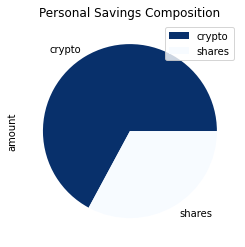

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y=0, title="Personal Savings Composition", colormap="Blues_r")

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

In [23]:
# Validate saving health (need to fix code for savings < emer fund)
if total_savings == emergency_fund:
    print("Great job reaching this financial goal")
elif total_savings < emergency_fund:
    # variable for reaching emergency fund 
    leftover = emergency_fund - total_savings
    print("You are $" + str(leftover) + "away from reaching the goal")
else:
    print("Grats! You have more than enough money in this fund")

Grats! You have more than enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [32]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-14', tz='America/New_York').isoformat()

In [39]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
#df_stock_data[tickers]= df_stock_data["close"]
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2020-11-18 00:00:00-05:00  117.95  117.99  117.8900  117.965  4880892  360.91   
2020-11-19 00:00:00-05:00  118.08  118.26  118.0300  118.180  5807639  355.61   
2020-11-20 00:00:00-05:00  118.19  118.34  118.1300  118.290  5496191  357.50   
2020-11-23 00:00:00-05:00  118.28  118.30  118.1734  118.270  3844326  357.28   
2020-11-24 00:00:00-05:00  118.24  118.28  118.0700  118.090  4113975  360.21   

                                                               
                              high      low   close    volume  
time                                                           
2020-11-18 00:00:00-05:00  361.500  356.240  356.29  57605438  
2020-11-19 00:00:00-05:00  358.180  354.150  357.76  47610697  
2020-11-20 00:00:00-05:00  357.720  355.250  355.34  47947194  
2020-11-23 00:00:00-05:00  358.790  354.865  357.47  49938331  
2020-11-24 00:00:00-05:00  363.805  359.290  363.19  49862168

In [41]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30Y = MCSimulation(
    portfolio_data= df_stock_data,
    weights=[.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [42]:
# Printing the simulation input data
MC_30Y.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2020-11-18 00:00:00-05:00  117.95  117.99  117.8900  117.965  4880892   
2020-11-19 00:00:00-05:00  118.08  118.26  118.0300  118.180  5807639   
2020-11-20 00:00:00-05:00  118.19  118.34  118.1300  118.290  5496191   
2020-11-23 00:00:00-05:00  118.28  118.30  118.1734  118.270  3844326   
2020-11-24 00:00:00-05:00  118.24  118.28  118.0700  118.090  4113975   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2020-11-18 00:00:00-05:00          NaN  360.91  361.500  356.240  356.29   
2020-11-19 00:00:00-05:00     0.001823  355.61  358.180  354.150  357.76   
2020-11-20 00:00:00-05:00     0.000931  357.50  357.720  355.250  355.34   
2020-11-23 00:00:00-05:00    -0.000169  357.28  358.790  354.865  357.47   
2020-11-24 00:00:00-05:00    -0.001522  360.21  363.805  359.290  363.19   

                                                  
                             volume daily_return  
time                                              
2020-11-18 00:00:00-05:00  57605438          NaN  
2020-11-19 00:00:00-05:00  47610697     0.004126  
2020-11-20 00:00:00-05:00  47947194    -0.006764  
2020-11-23 00:00:00-05:00  49938331     0.005994  
2020-11-24 00:00:00-05:00  49862168     0.016001

In [43]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000604,1.005319,1.005130,0.999321,1.004240,1.003185,1.005814,1.001676,0.999339,0.995370,...,1.002332,1.003705,1.002484,1.004370,0.994377,0.996254,0.991720,1.007935,1.015669,1.002140
2,1.001651,0.993093,1.015029,0.999345,1.007462,1.011614,1.000828,1.000080,0.996905,0.994477,...,1.001811,1.005258,1.006603,1.009613,0.994831,0.987554,0.994686,1.012982,1.012773,0.999477
3,1.001822,0.995475,1.018816,1.002068,1.001209,1.009436,1.002901,0.998995,1.003138,0.992220,...,1.000110,0.998060,1.012395,1.016477,0.993220,0.995760,0.984606,1.008734,1.008663,0.997514
4,0.993770,0.991334,1.022564,1.004943,0.996549,1.012550,1.003737,0.995615,1.005757,0.992235,...,0.995012,0.991864,1.006812,1.016942,1.001248,0.997557,0.983428,1.014534,1.015157,1.002746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,378.256373,361.297022,326.358215,94.600890,262.106112,241.272224,268.120247,401.445279,108.198678,430.916061,...,239.201898,408.067238,334.803054,296.389719,507.023370,302.136496,436.709504,167.337655,271.794859,346.161454
7557,378.660844,356.442736,327.186391,94.506783,262.848254,242.873066,266.334148,399.966440,108.433043,430.334357,...,239.947469,410.038494,332.612238,298.627485,510.641315,303.053661,437.066880,167.541970,273.391530,347.287655
7558,378.479822,354.334900,328.984619,94.907500,263.539234,244.726810,266.965992,402.401107,108.071398,431.026892,...,240.700131,412.742812,332.792835,297.844950,517.270015,302.353319,439.709846,168.061952,271.265686,346.696466
7559,379.508112,355.601485,327.095671,94.925215,263.343959,246.761800,265.031136,403.661982,108.481119,434.401564,...,240.706310,413.534355,334.660334,297.219808,515.928443,300.743419,440.064616,169.135002,272.034144,348.546719


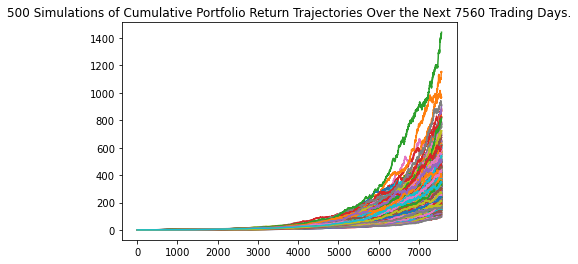

In [44]:
# Plot simulation outcomes
plot_MC30Y = MC_30Y.plot_simulation()

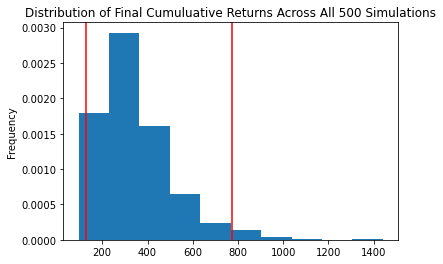

In [45]:
# Plot probability distribution and confMC_30Ye intervals
dist_plot_MC30Y = MC_30Y.plot_distribution()

### Retirement Analysis

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_tbl = MC_30Y.summarize_cumulative_return()

# Print summary statistics
print(stats_tbl)

count            500.000000
mean             346.571840
std              168.231782
min               94.952810
25%              233.509514
50%              316.353741
75%              417.459432
max             1440.975057
95% CI Lower     127.772896
95% CI Upper     773.619609
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [50]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats_tbl[8]*initial_investment,2)
ci_upper = round(stats_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $2555457.92 and $15472392.18


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [51]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats_tbl[8]*initial_investment,2)
ci_upper = round(stats_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $3833186.88 and $23208588.28


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [53]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# changed weights to higher stock:bond ratio
MC_5Y = MCSimulation(
    portfolio_data= df_stock_data,
    weights=[.2,.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [54]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000682,1.007139,1.004705,0.995020,1.016029,0.995143,1.010370,0.998469,0.998282,1.003612,...,1.001488,1.001500,0.997471,0.998933,1.004903,1.011125,0.998578,1.003419,1.000253,1.005404
2,1.002018,0.998932,1.000602,1.003884,1.017877,1.004731,1.012831,1.010121,0.993901,1.011949,...,0.998160,1.011080,1.012437,0.995789,0.994445,1.013146,1.004644,1.005343,1.005980,1.005546
3,1.005372,0.998868,0.982406,1.017050,1.024481,1.000127,1.025612,1.008449,0.998219,1.010673,...,0.982038,1.027690,1.029024,1.006998,0.990454,1.008707,1.008643,1.003116,0.997627,1.011216
4,1.005041,1.010180,0.980437,1.018110,1.034597,1.003071,1.026557,1.014694,0.992750,1.013124,...,0.983467,1.036892,1.025839,1.019774,0.990004,1.012882,1.016278,1.019739,1.001631,1.014309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.836400,5.965012,3.538846,5.229613,2.717161,2.801686,5.089231,3.846003,4.277618,5.326557,...,2.524741,6.109325,5.335068,5.762671,4.105858,3.974584,4.050870,4.435552,4.318575,5.747713
1257,2.861972,5.867198,3.502929,5.251832,2.720977,2.801411,5.086045,3.851438,4.337449,5.303212,...,2.551039,6.149755,5.327751,5.753722,4.059250,3.930358,4.040889,4.457168,4.335999,5.740240
1258,2.803374,5.843223,3.516297,5.298988,2.750917,2.810314,5.068687,3.838239,4.353519,5.243681,...,2.535811,6.140620,5.282001,5.845728,4.036392,3.962667,4.055774,4.484769,4.370720,5.825214
1259,2.802700,5.824945,3.489968,5.307310,2.737747,2.850987,5.031544,3.887225,4.375347,5.251731,...,2.533261,6.159581,5.331923,5.853070,4.051007,3.971820,4.045274,4.500281,4.438789,5.808022


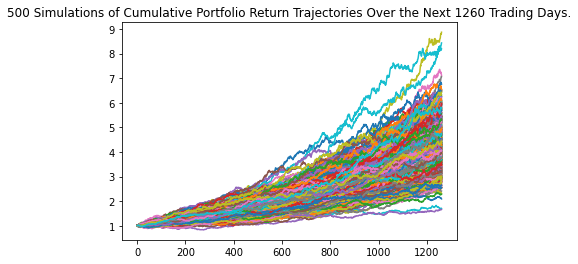

In [58]:
# Plot simulation outcomes
line_plot5Y = MC_5Y.plot_simulation()

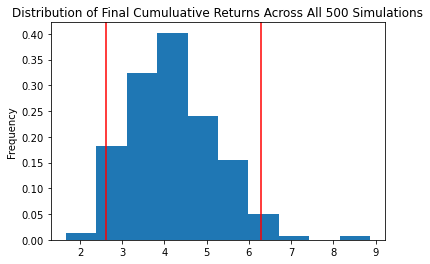

In [60]:
# Plot probability distribution and confidence intervals
dist_plot5Y = MC_5Y.plot_distribution()

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_5Y = MC_5Y.summarize_cumulative_return()

# Print summary statistics
print(stats_5Y)

count           500.000000
mean              4.202315
std               1.022022
min               1.662819
25%               3.463328
50%               4.094299
75%               4.793166
max               8.871184
95% CI Lower      2.606178
95% CI Upper      6.287941
Name: 1260, dtype: float64


In [63]:
# Set initial investment (increase to 20k)
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stats_5Y[8]*initial_investment,2)
ci_upper_five = round(stats_5Y[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $52123.55 and $125758.83


### Ten Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# stock:bond ratio same as 5Y
MC_10Y = MCSimulation(
    portfolio_data= df_stock_data,
    weights=[.2,.8],
    num_simulation = 500,
    num_trading_days = 252*10  
)

In [65]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008465,0.994337,1.004671,1.000163,1.000930,1.020403,1.006152,1.001655,0.994497,1.004847,...,1.006541,1.002800,1.000662,0.991727,1.012054,1.006221,0.994853,1.009400,1.008725,1.000349
2,1.016229,1.002988,1.003224,0.993822,1.008952,1.023673,1.008560,0.996219,1.004279,1.004573,...,1.006233,1.003088,0.996380,0.991820,1.013510,1.009589,0.986401,1.002430,1.015384,1.000271
3,1.013396,1.001491,0.996672,0.993772,1.012809,1.025380,1.016733,1.002882,1.010970,1.004282,...,1.010481,1.002026,1.001141,0.992707,1.007905,1.002978,0.983727,1.009187,1.017036,0.995577
4,1.012968,0.999773,1.009273,0.990495,1.023892,1.029551,1.017164,1.006741,1.000502,1.018567,...,1.014930,1.007938,1.007680,0.987924,0.994829,1.006876,0.988619,1.011528,1.031864,1.001468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,39.354969,19.328686,15.907252,19.822098,30.702796,13.762920,17.838671,22.339343,10.936287,25.154639,...,15.244722,8.761414,8.537642,13.253481,14.422815,19.542157,12.833601,20.264697,12.973969,24.201832
2517,39.452097,19.338537,16.050206,19.939093,30.505935,13.798593,17.683208,22.472188,11.043385,24.935907,...,15.154103,8.729268,8.474781,13.259583,14.530990,19.435588,12.695188,20.166971,12.953999,24.314165
2518,40.035829,19.334168,16.142269,20.006286,30.207740,13.539021,17.641994,22.149559,10.947947,25.157147,...,15.170091,8.760185,8.510628,13.274963,14.721945,19.390042,12.636053,20.002213,13.096974,24.578865
2519,39.899513,19.159831,16.335928,20.015124,30.165210,13.509143,17.822080,22.137626,10.863121,25.213111,...,15.063357,8.791151,8.470851,13.189817,15.105734,19.106298,12.749423,19.764195,13.104738,24.795266


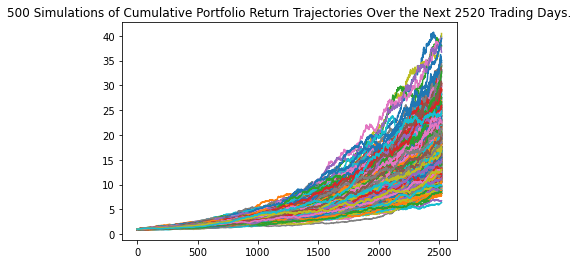

In [66]:
# Plot simulation outcomes
line_plot_ten = MC_10Y.plot_simulation()

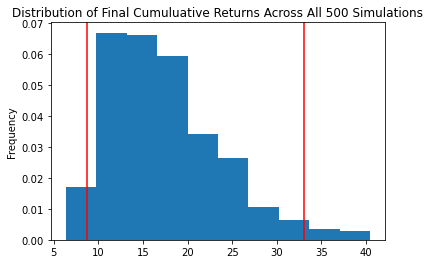

In [67]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_10Y.plot_distribution()

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_10Y = MC_10Y.summarize_cumulative_return()

# Print summary statistics
print(stats_10Y)

count           500.000000
mean             17.529651
std               6.227311
min               6.359806
25%              12.890162
50%              16.305395
75%              20.914711
max              40.451499
95% CI Lower      8.729952
95% CI Upper     33.071629
Name: 2520, dtype: float64


In [69]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stats_5Y[8]*initial_investment,2)
ci_upper_ten = round(stats_5Y[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $52123.55 and $125758.83
